In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

training_set= pd.read_excel('C:\\Users\\javva\\Downloads\\beer_training.xlsx')
test_set= pd.read_excel('C:\\Users\\javva\\Downloads\\beer_test.xlsx')

training_set.index = np.arange(1, len(training_set) + 1)
test_set.index = np.arange(1, len(test_set) + 1)
print(len(training_set))
print(len(test_set))
training_set = training_set[['beer_id','calorific_value', 'nitrogen', 'turbidity', 'alcohol','sugars','bitterness','color',
                   'degree_of_fermentation','style']]
test_set = test_set[['beer_id','calorific_value', 'nitrogen', 'turbidity', 'alcohol','sugars','bitterness','color',
                   'degree_of_fermentation','style']]

X_train = training_set.iloc[:, 1:9].values
y_train = training_set.iloc[:, -1].values
X_test = test_set.iloc[:, 1:9].values
y_test = test_set.iloc[:, -1].values

124
30


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,15)
train_scores={}
train_scores_list=[]
test_scores={}
test_scores_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train_knn=knn.predict(X_train)
    train_scores[k]=metrics.accuracy_score(y_train, y_pred_train_knn)
    train_scores_list.append(metrics.accuracy_score(y_train, y_pred_train_knn))
    y_pred_test_knn = knn.predict(X_test)
    test_scores[k]=metrics.accuracy_score(y_test, y_pred_test_knn)
    test_scores_list.append(metrics.accuracy_score(y_test, y_pred_test_knn))

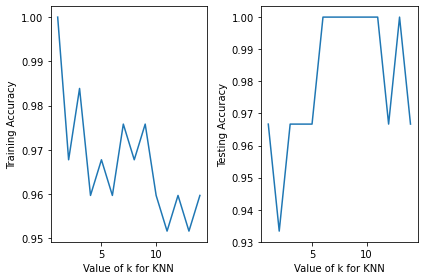

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plotting releationship between k and training accuracy
plt.subplot(1,2,1)
plt.plot(k_range,train_scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range,test_scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.tight_layout()

Accuracy: 0.9758064516129032
[[42  0  0]
 [ 2 41  1]
 [ 0  0 38]]


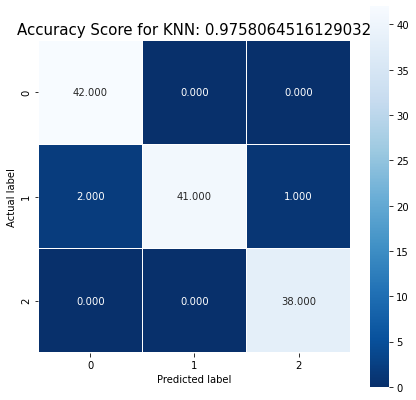

In [9]:
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_train_knn=knn.predict(X_train)
train_score_knn=metrics.accuracy_score(y_train, y_pred_train_knn)
print("Accuracy:",train_score_knn)
cm_knn = metrics.confusion_matrix(y_train, y_pred_train_knn)
print(cm_knn)
plt.figure(figsize=(7,7))
sns.heatmap(cm_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for KNN: {0}'.format(train_score_knn)
plt.title(all_sample_title, size = 15);

Accuracy: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


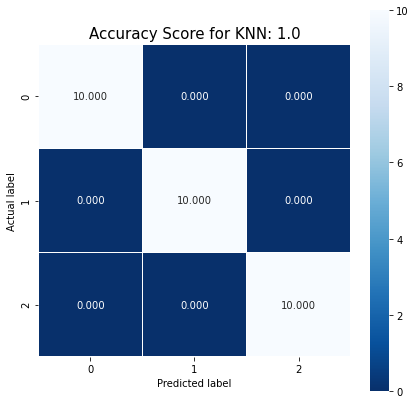

In [10]:
y_pred_test_knn=knn.predict(X_test)
test_score_knn=metrics.accuracy_score(y_test, y_pred_test_knn)
print("Accuracy:",test_score_knn)
cm_knn = metrics.confusion_matrix(y_test, y_pred_test_knn)
print(cm_knn)
plt.figure(figsize=(7,7))
sns.heatmap(cm_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for KNN: {0}'.format(test_score_knn)
plt.title(all_sample_title, size = 15);

Accuracy: 0.9919354838709677
[[42  0  0]
 [ 0 43  1]
 [ 0  0 38]]


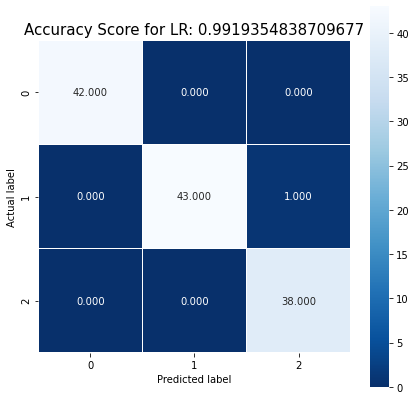

In [11]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
logmodel = LogisticRegression(C=1,dual=False,max_iter=100,class_weight='balanced',solver='liblinear')
logmodel.fit(X_train, y_train)
y_pred_train_lr = logmodel.predict(X_train)
train_score_lr=metrics.accuracy_score(y_train, y_pred_train_lr)
print("Accuracy:",train_score_lr)
cm_lr = metrics.confusion_matrix(y_train, y_pred_train_lr)
print(cm_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for LR: {0}'.format(train_score_lr)
plt.title(all_sample_title, size = 15);

Accuracy: 0.9666666666666667
[[ 9  1  0]
 [ 0 10  0]
 [ 0  0 10]]


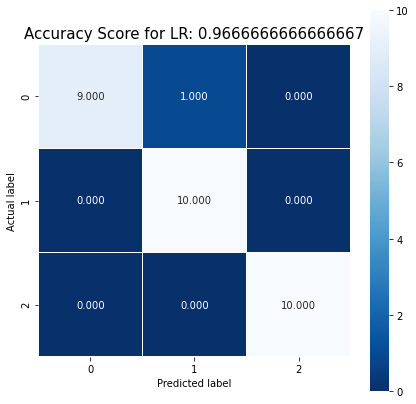

In [13]:
y_pred_test_lr = logmodel.predict(X_test)
test_score_lr=metrics.accuracy_score(y_test, y_pred_test_lr)
print("Accuracy:",test_score_lr)
cm_lr = metrics.confusion_matrix(y_test, y_pred_test_lr)
print(cm_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for LR: {0}'.format(test_score_lr)
plt.title(all_sample_title, size = 15);